## DVL Spoofing
The DVL spoofing system was incorporated into the ABM by representing the array nodes as individual agents.  Physical system elements such as cabling and processing hardware were not included.  Each spoofer-node agent reacts if a threat-UUV agent is within a specified radius and the threat-UUV is pinging in the current simulation time step.  When spoofed, the position-fix of the threat-UUV is moved a fixed distance in a specified direction, to represent false velocity information fed into the DVL.  This results in the threat UUV maneuvering to correct course based on its perceived position, rather than actual position, and would increase the position error in the minefield map.  As the threat UUV encounters multiple spoofer-nodes, the position error would become greater as the survey progresses.  
For the architecture evaluation, DVL spoofer nodes were arranged in a regularly spaced grid covering the minefield, treating the grid spacing as a parameter to be adjusted in the experiment.  The effect radius and magnitude of the spoofer-nodes, as well as the direction of the induced error, were varied for the experiment to quantify the effectiveness of each parameter on the threat UUV’s ability to accurately survey the minefield as measured by the mean and standard deviation of the mine marker position errors.


In [1]:
library('dplyr')


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [20]:
# load baseline datafiles
doe.baseline <- read.csv("./baseline_large_NOLH_description.csv", header = TRUE)  # NOLH experiment design
results.baseline <- read.csv("./baseline/baseline threat run large NOLH experiment-table.csv", skip=6, header=TRUE)

# format column names
colnames(doe.baseline)[1] <- "experiment.number"

# build the dataset
data.baseline <- merge(doe.baseline, results.baseline, "experiment.number")

# scale to real world size
data.baseline$marker.mean <- data.baseline$marker.mean * 5
data.baseline$marker.std.dev <- data.baseline$marker.std.dev * 5

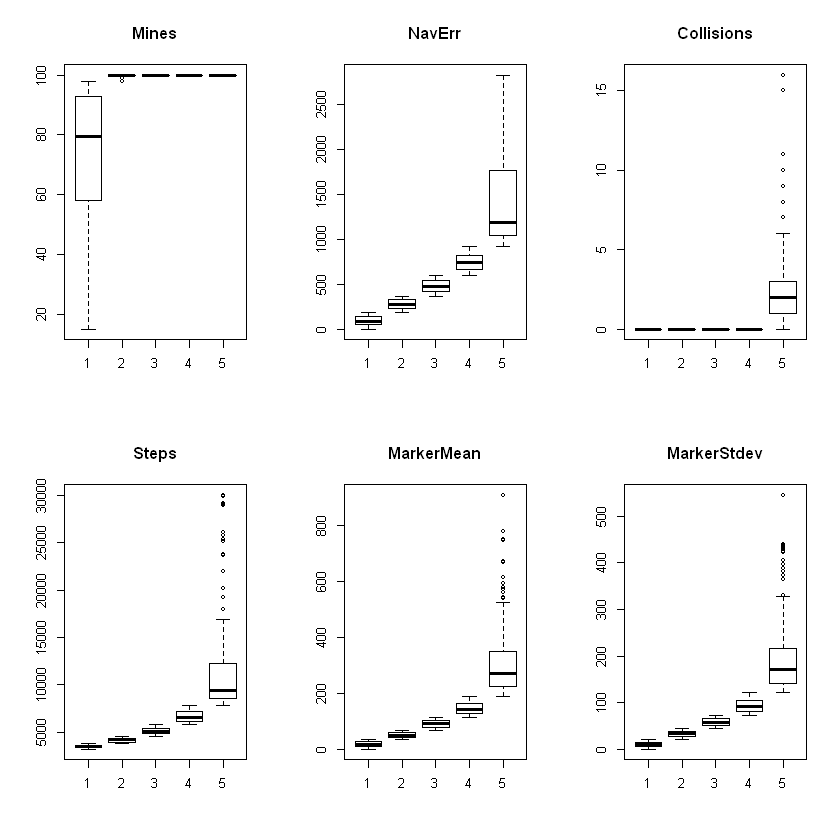

In [21]:
# split the run results into quintiles by measure of performance
data.baseline %>% mutate(
    mine.quintile = ntile(data.baseline$count.mine.contacts, 5),
    step.quintile = ntile(data.baseline$X.step, 5),
    nav.error.quintile = ntile(max.nav.error, 5),
    marker.mean.quintile = ntile(marker.mean, 5),
    marker.std.quintile = ntile(marker.std.dev, 5),
    collisions.quintile = ntile(number.of.collisions, 5)
) -> data.baseline.quintiles

# plot the quintile distributions of the baseline
layout(matrix(c(1,2,3,4,5,6),2,3))
boxplot(count.mine.contacts~mine.quintile, data=data.baseline.quintiles, main='Mines')
boxplot(X.step.~step.quintile, data=data.baseline.quintiles, main='Steps')
boxplot(max.nav.error~nav.error.quintile, data=data.baseline.quintiles, main='NavErr')
boxplot(marker.mean~marker.mean.quintile, data=data.baseline.quintiles, main='MarkerMean')
boxplot(number.of.collisions~collisions.quintile, data=data.baseline.quintiles, main='Collisions')
boxplot(marker.std.dev~marker.std.quintile, data=data.baseline.quintiles, main='MarkerStdev')


Call:
lm(formula = baseline.marker.mean.formula, data = data.baseline)

Residuals:
    Min      1Q  Median      3Q     Max 
-200.52  -44.84   -9.57   25.30  744.81 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                                5.0723     5.0920   0.996 0.319372
nav.bearing.std                         -474.0799   392.2471  -1.209 0.227029
nav.bearing.std:uuv.speed                631.9606   187.6905   3.367 0.000782
nav.bearing.std:side_hi_range              1.8529     0.5573   3.325 0.000909
nav.bearing.std:uuv.speed:side_hi_range   -1.1584     0.2687  -4.312 1.75e-05
                                           
(Intercept)                                
nav.bearing.std                            
nav.bearing.std:uuv.speed               ***
nav.bearing.std:side_hi_range           ***
nav.bearing.std:uuv.speed:side_hi_range ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard e


Call:
lm(formula = marker.mean ~ ., data = data.baseline)

Residuals:
     Min       1Q   Median       3Q      Max 
-263.935  -21.973   -3.082   17.348  301.601 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    2.269e+02  2.823e+01   8.037 2.09e-15 ***
experiment.number             -2.881e-02  3.773e-02  -0.764 0.445239    
source.level                  -5.843e-01  1.126e-01  -5.188 2.47e-07 ***
classification.threshold.std   8.046e-01  5.161e-01   1.559 0.119213    
classification.threshold.mean -4.714e-01  4.674e-01  -1.009 0.313369    
sonar_ping_rate                4.653e-01  3.314e-01   1.404 0.160621    
uuv.speed                     -1.239e+01  2.676e+00  -4.632 4.00e-06 ***
turn.radius                    7.152e-01  4.639e-01   1.542 0.123432    
side_angle                     2.248e-02  1.865e-01   0.121 0.904079    
side_hi_range                 -3.242e-02  2.322e-02  -1.396 0.162891    
forward_angle      

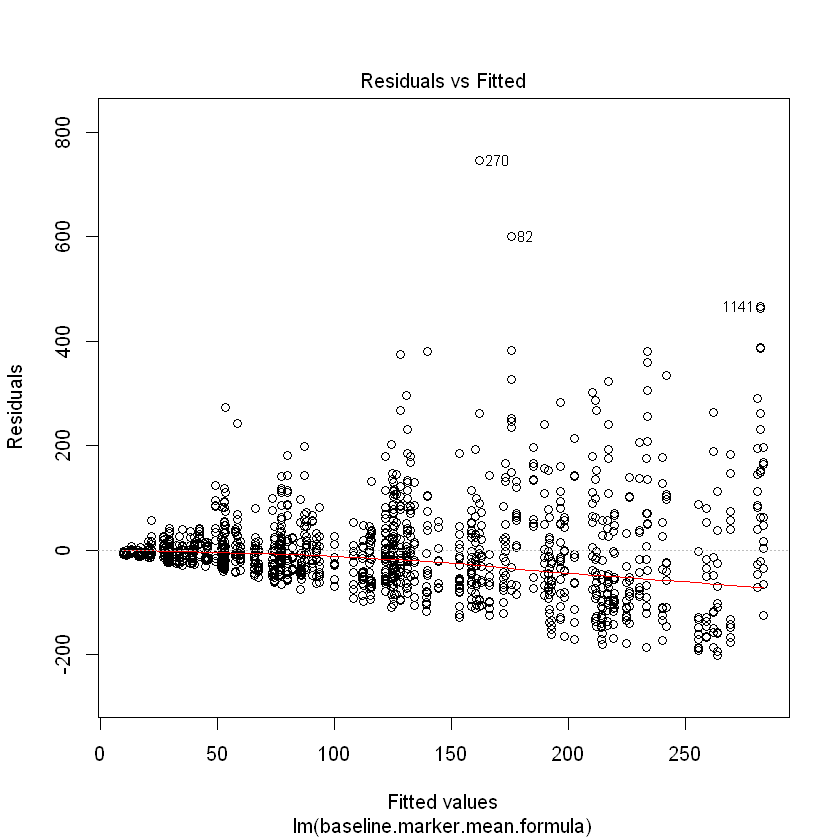

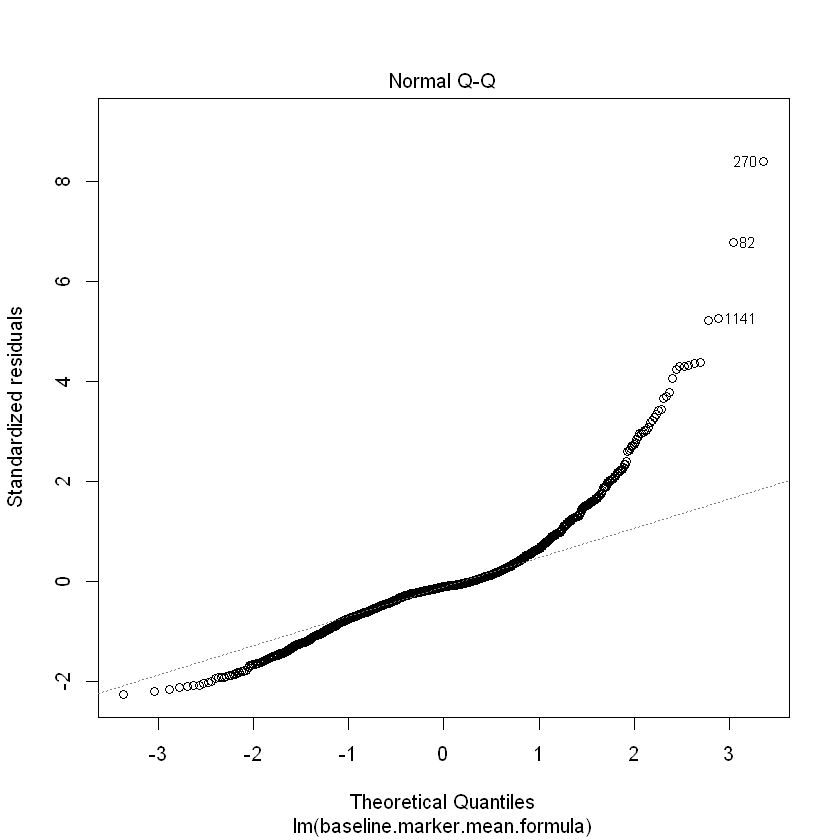

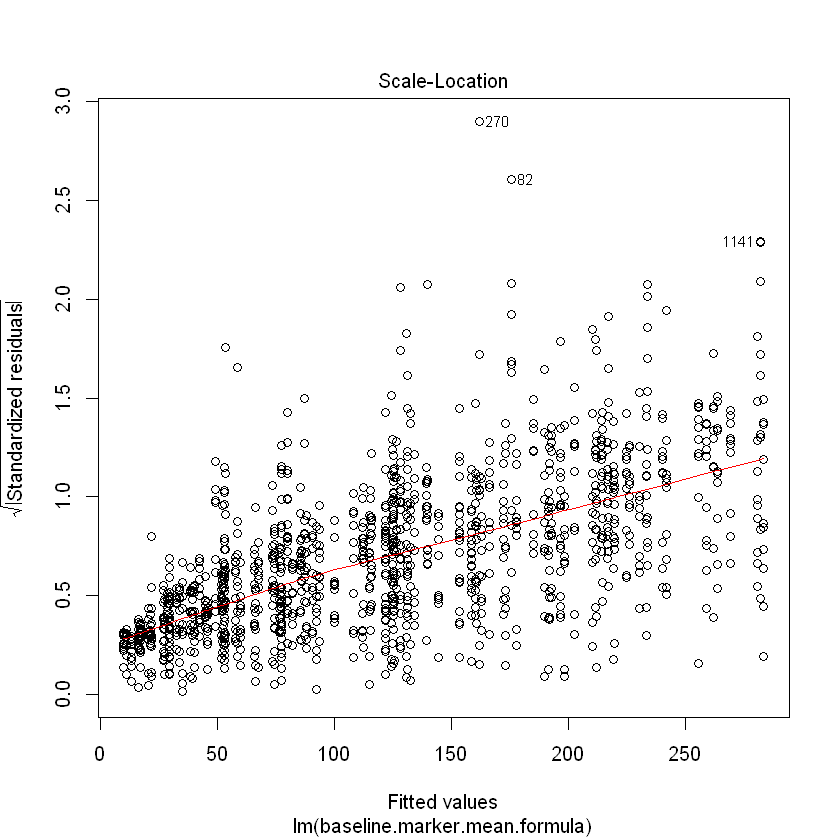

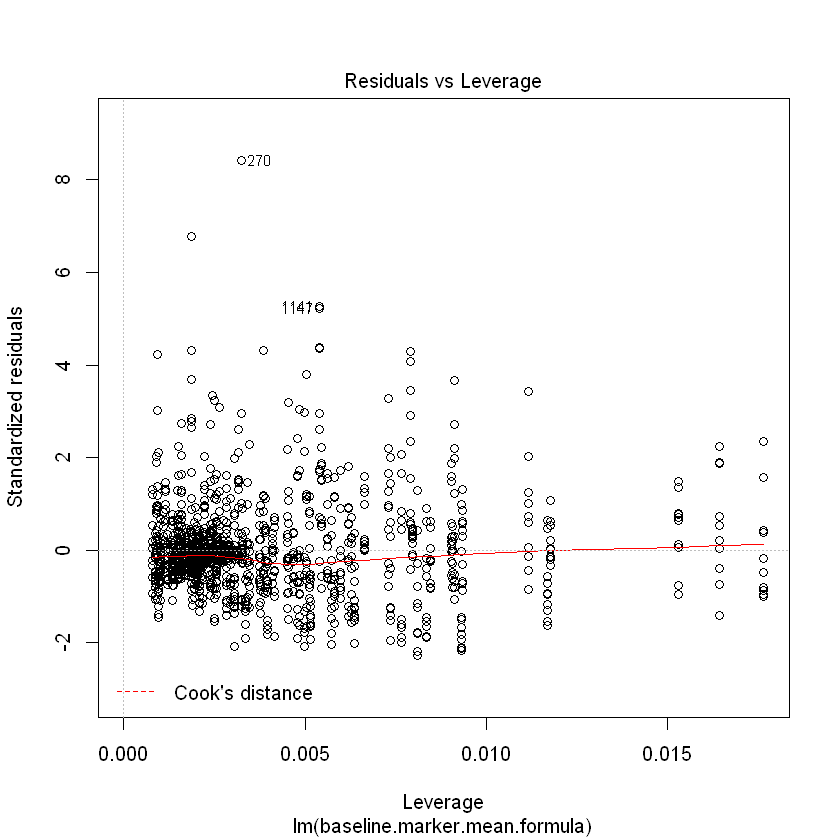

In [79]:
baseline.marker.mean.formula <- marker.mean ~ nav.bearing.std + uuv.speed:nav.bearing.std + nav.bearing.std:side_hi_range + uuv.speed:nav.bearing.std:side_hi_range
baseline.marker.mean.model <- lm(baseline.marker.mean.formula, data=data.baseline)
summary(baseline.marker.mean.model)
summary(lm(marker.mean ~ . , data=data.baseline))
plot(baseline.marker.mean.model)

In [41]:
baseline.marker.std.formula <- marker.std.dev ~ sonar_ping_rate + uuv.speed*nav.bearing.std + drift.speed + current.heading + turn.radius
baseline.marker.std.model <- lm(baseline.marker.std.formula, data=data.baseline)

summary(baseline.marker.std.model)



Call:
lm(formula = baseline.marker.std.formula, data = data.baseline)

Residuals:
    Min      1Q  Median      3Q     Max 
-127.63  -29.37   -6.21   16.87  436.05 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -26.48391   14.74369  -1.796   0.0727 .  
sonar_ping_rate             0.77125    0.37877   2.036   0.0419 *  
uuv.speed                  -9.13633    5.53984  -1.649   0.0994 .  
nav.bearing.std           471.48104   39.71280  11.872  < 2e-16 ***
drift.speed                51.36188   10.29156   4.991 6.84e-07 ***
current.heading             0.08041    0.01481   5.429 6.76e-08 ***
turn.radius                 0.86469    0.53209   1.625   0.1044    
uuv.speed:nav.bearing.std -85.20963   19.07626  -4.467 8.64e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 55.55 on 1282 degrees of freedom
Multiple R-squared:  0.432,	Adjusted R-squared:  0.4289 
F-statistic: 139.3 on 7 a

In [22]:
# load datafiles
doe.spoofer <- read.csv("./spoofer_NOLH_description.csv", header = TRUE)  # NOLH experiment design
results.spoofer <- read.csv("./spoofer/baseline spoofer grid-table.csv", skip=6, header=TRUE)

# format column names
colnames(doe.spoofer)[1] <- "experiment.number"

# build the dataset
data.spoofer <- merge(doe.spoofer, results.spoofer, "experiment.number")

# scale to real world size
data.spoofer$marker.mean <- data.spoofer$marker.mean * 5
data.spoofer$marker.std.dev <- data.spoofer$marker.std.dev * 5

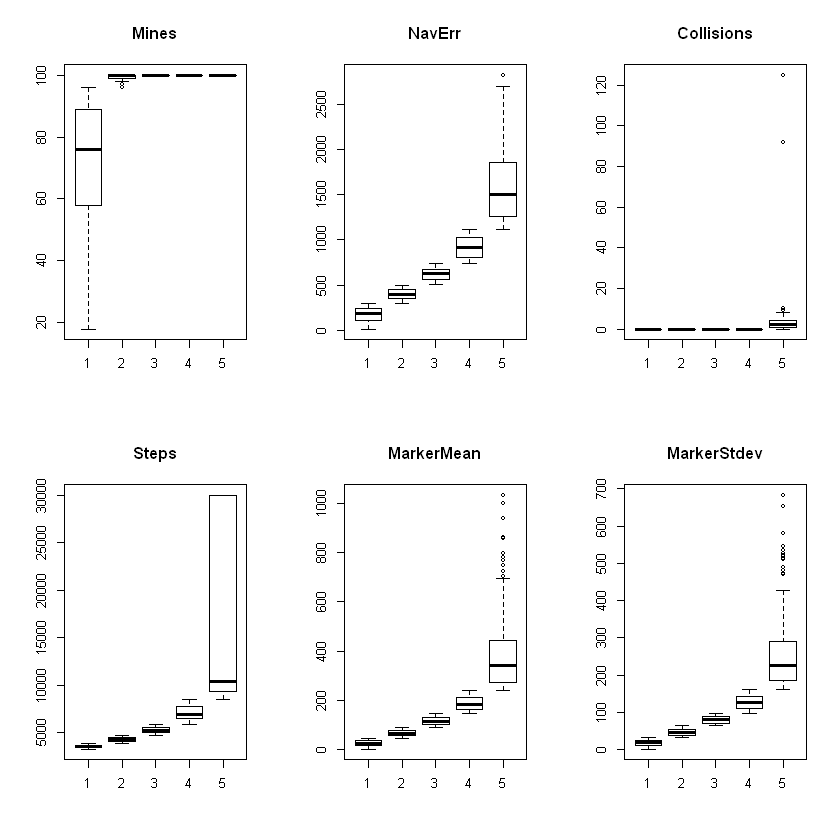

In [23]:
# split the run results into quintiles by measure of performance
data.spoofer %>% mutate(
    mine.quintile = ntile(data.spoofer$count.mine.contacts, 5),
    step.quintile = ntile(data.spoofer$X.step, 5),
    nav.error.quintile = ntile(max.nav.error, 5),
    marker.mean.quintile = ntile(marker.mean, 5),
    marker.std.quintile = ntile(marker.std.dev, 5),
    collisions.quintile = ntile(number.of.collisions, 5)
) -> data.spoofer.quintiles

# plot the quintile distributions of the baseline
layout(matrix(c(1,2,3,4,5,6),2,3))
boxplot(count.mine.contacts~mine.quintile, data=data.spoofer.quintiles, main='Mines')
boxplot(X.step.~step.quintile, data=data.spoofer.quintiles, main='Steps')
boxplot(max.nav.error~nav.error.quintile, data=data.spoofer.quintiles, main='NavErr')
boxplot(marker.mean~marker.mean.quintile, data=data.spoofer.quintiles, main='MarkerMean')
boxplot(number.of.collisions~collisions.quintile, data=data.spoofer.quintiles, main='Collisions')
boxplot(marker.std.dev~marker.std.quintile, data=data.spoofer.quintiles, main='MarkerStdev')

With the DVL Spoofing System exploiting the threat-UUV's position-fix vulnerability, the measures of vulnerabilty are the navigation error, marker mean error, and marker standard deviation.  The dataset is first compared to the baseline run with a two-tailed t-test.

In [89]:
t.test(data.baseline$marker.mean, data.spoofer$marker.mean)
t.test(data.baseline$marker.std.dev, data.spoofer$marker.std.dev)
t.test(data.baseline$max.nav.error, data.spoofer$max.nav.error)
t.test(data.baseline$count.mine.contacts, data.spoofer$count.mine.contacts)
t.test(data.baseline$X.step, data.spoofer$X.step)
t.test(data.baseline$number.of.collisions, data.spoofer$number.of.collisions)


	Welch Two Sample t-test

data:  data.baseline$marker.mean and data.spoofer$marker.mean
t = -6.4292, df = 2464.6, p-value = 1.536e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -43.14978 -22.97988
sample estimates:
mean of x mean of y 
 123.4202  156.4851 



	Welch Two Sample t-test

data:  data.baseline$marker.std.dev and data.spoofer$marker.std.dev
t = -8.0522, df = 2442.3, p-value = 1.257e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -33.15168 -20.16708
sample estimates:
mean of x mean of y 
 78.35796 105.01734 



	Welch Two Sample t-test

data:  data.baseline$max.nav.error and data.spoofer$max.nav.error
t = -6.7738, df = 2570.5, p-value = 1.549e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -179.79851  -99.07087
sample estimates:
mean of x mean of y 
 604.4892  743.9239 



	Welch Two Sample t-test

data:  data.baseline$count.mine.contacts and data.spoofer$count.mine.contacts
t = 1.483, df = 2561.9, p-value = 0.1382
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.270011  1.945980
sample estimates:
mean of x mean of y 
 94.87519  94.03721 



	Welch Two Sample t-test

data:  data.baseline$X.step and data.spoofer$X.step
t = -3.5533, df = 2441.9, p-value = 0.0003877
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1256.8383  -362.9369
sample estimates:
mean of x mean of y 
 6582.270  7392.157 



	Welch Two Sample t-test

data:  data.baseline$number.of.collisions and data.spoofer$number.of.collisions
t = -1.4647, df = 1518.3, p-value = 0.1432
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.44788957  0.06494383
sample estimates:
mean of x mean of y 
0.4790698 0.6705426 


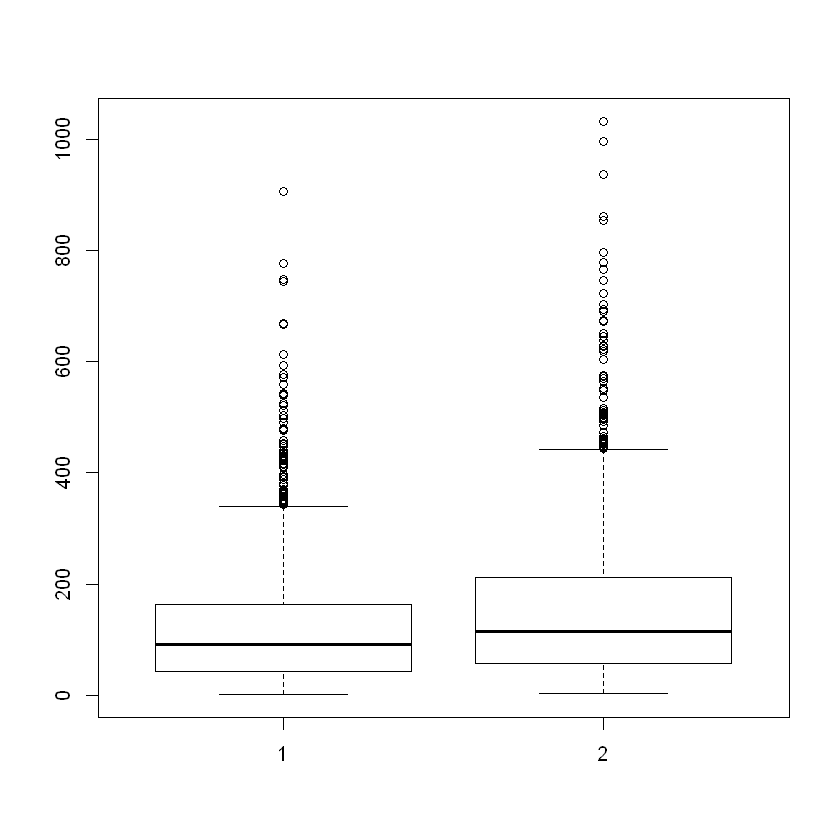

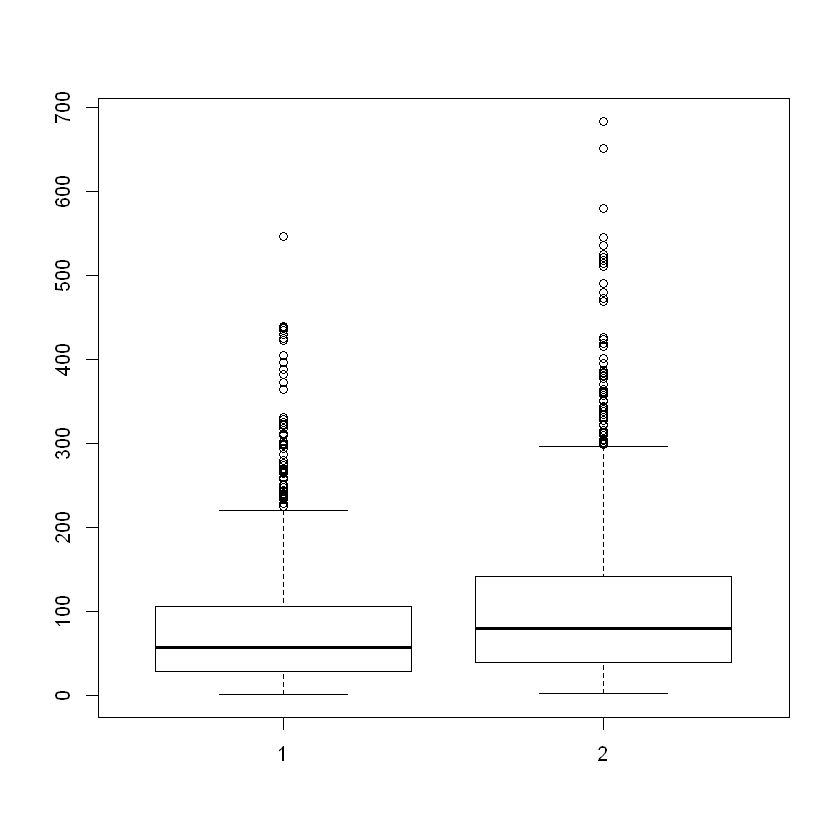

In [88]:
boxplot(data.baseline$marker.mean,data.spoofer$marker.mean)
boxplot(data.baseline$marker.std.dev,data.spoofer$marker.std.dev)

In [83]:
spoofer.marker.mean.formula <- marker.mean ~ spoofer.count + sonar_ping_rate + spoofer.radius*uuv.speed + spoofer.strength + uuv.speed + nav.bearing.std
spoofer.marker.mean.model <- lm(spoofer.marker.mean.formula, data=data.spoofer)
spoofer.marker.std.formula <- marker.std.dev ~ spoofer.count + sonar_ping_rate + spoofer.radius*uuv.speed + spoofer.heading + spoofer.strength + uuv.speed + drift.speed + current.heading + nav.bearing.std + nav.velocity.std.cm + turn.radius
spoofer.marker.std.model <- lm(spoofer.marker.std.formula, data=data.spoofer)
summary(spoofer.marker.mean.model)
summary(spoofer.marker.std.model)
AIC(spoofer.marker.mean.model)


Call:
lm(formula = spoofer.marker.mean.formula, data = data.spoofer)

Residuals:
    Min      1Q  Median      3Q     Max 
-248.98  -68.90  -13.77   45.87  646.48 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               90.53933   27.30415   3.316 0.000939 ***
spoofer.count             -0.62380    0.07022  -8.884  < 2e-16 ***
sonar_ping_rate           -4.87436    0.74993  -6.500 1.15e-10 ***
spoofer.radius             8.80620    1.32786   6.632 4.87e-11 ***
uuv.speed                 -9.12439   11.47594  -0.795 0.426709    
spoofer.strength          11.47256    2.14913   5.338 1.11e-07 ***
nav.bearing.std          519.45308   21.49180  24.170  < 2e-16 ***
spoofer.radius:uuv.speed  -3.16502    0.63616  -4.975 7.40e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 110 on 1282 degrees of freedom
Multiple R-squared:  0.419,	Adjusted R-squared:  0.4158 
F-statistic: 132.1 on 7 and 1282 DF, 


Call:
lm(formula = spoofer.marker.std.formula, data = data.spoofer)

Residuals:
    Min      1Q  Median      3Q     Max 
-180.92  -44.30  -13.46   33.88  397.62 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              112.15847   21.42886   5.234 1.94e-07 ***
spoofer.count             -0.54415    0.04527 -12.020  < 2e-16 ***
sonar_ping_rate           -3.92935    0.48373  -8.123 1.06e-15 ***
spoofer.radius             4.95050    0.85595   5.784 9.18e-09 ***
uuv.speed                -13.05395    7.39792  -1.765 0.077880 .  
spoofer.heading           -0.03278    0.01913  -1.714 0.086776 .  
spoofer.strength           7.72860    1.38661   5.574 3.04e-08 ***
drift.speed               95.01737   13.15635   7.222 8.77e-13 ***
current.heading            0.08793    0.01891   4.650 3.66e-06 ***
nav.bearing.std          287.63438   13.85757  20.756  < 2e-16 ***
nav.velocity.std.cm       -8.71545    7.14148  -1.220 0.222539    
turn.radius       

[1] 15798.52


Call:
lm(formula = baseline.marker.mean.formula, data = data.spoofer)

Residuals:
    Min      1Q  Median      3Q     Max 
-293.07  -63.35  -23.09   33.05  736.55 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                              25.1467     6.6937   3.757  0.00018
nav.bearing.std                         820.5985   515.6354   1.591  0.11176
nav.bearing.std:uuv.speed               197.2709   246.7319   0.800  0.42413
nav.bearing.std:side_hi_range             0.2161     0.7326   0.295  0.76804
nav.bearing.std:uuv.speed:side_hi_range  -0.6072     0.3532  -1.719  0.08580
                                           
(Intercept)                             ***
nav.bearing.std                            
nav.bearing.std:uuv.speed                  
nav.bearing.std:side_hi_range              
nav.bearing.std:uuv.speed:side_hi_range .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1

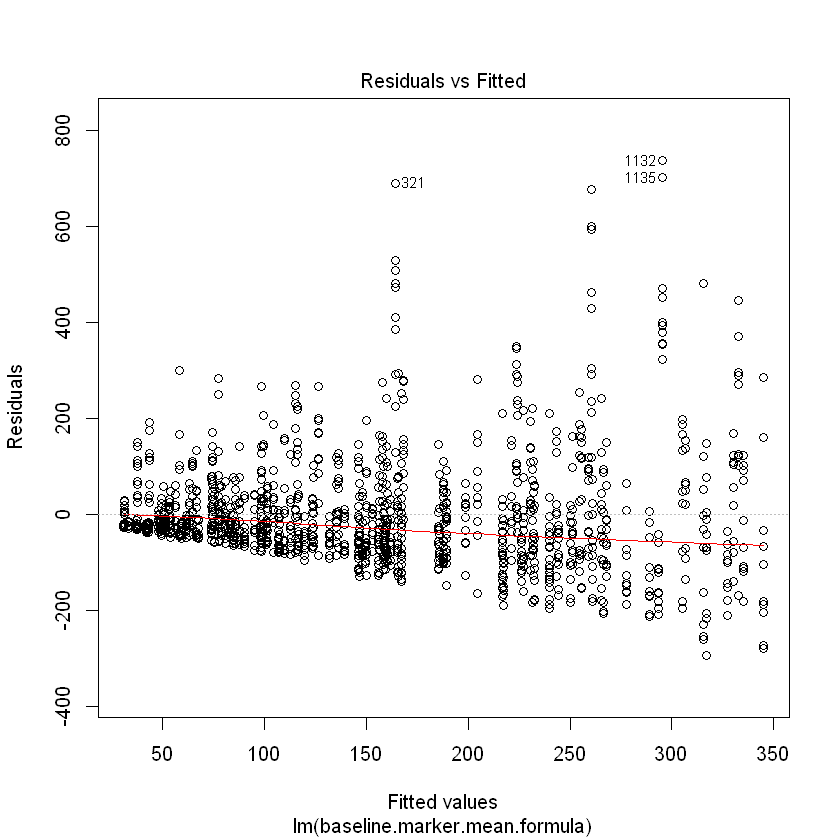

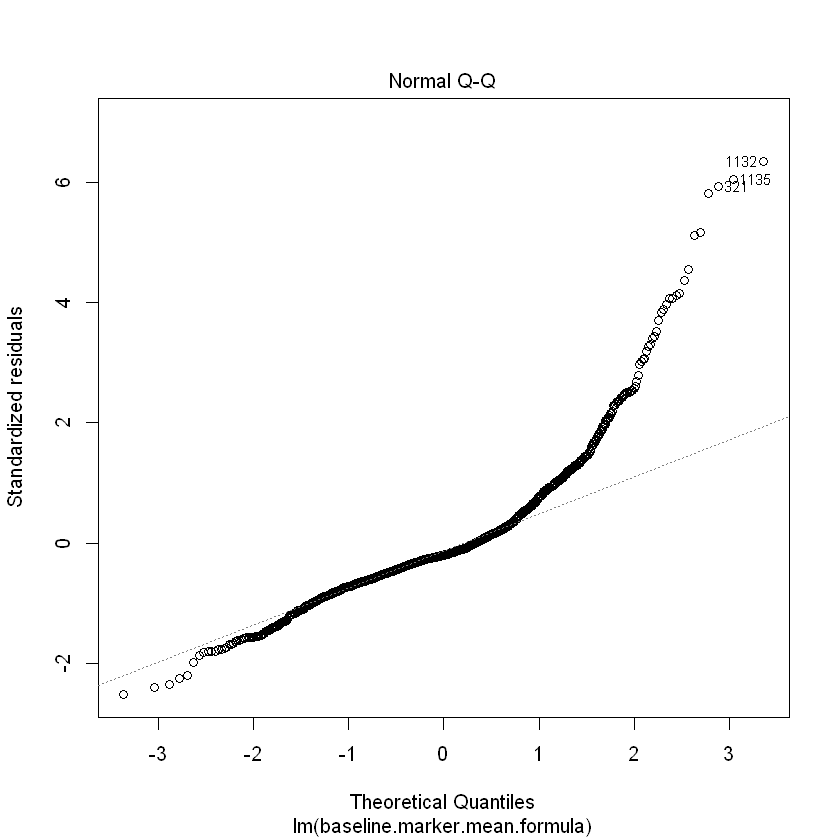

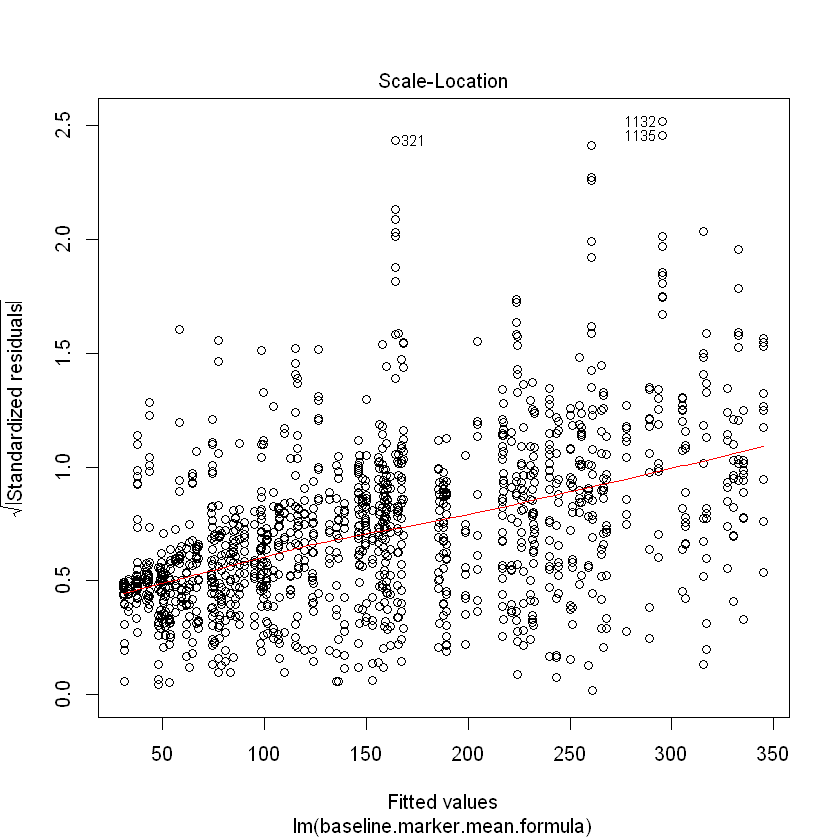

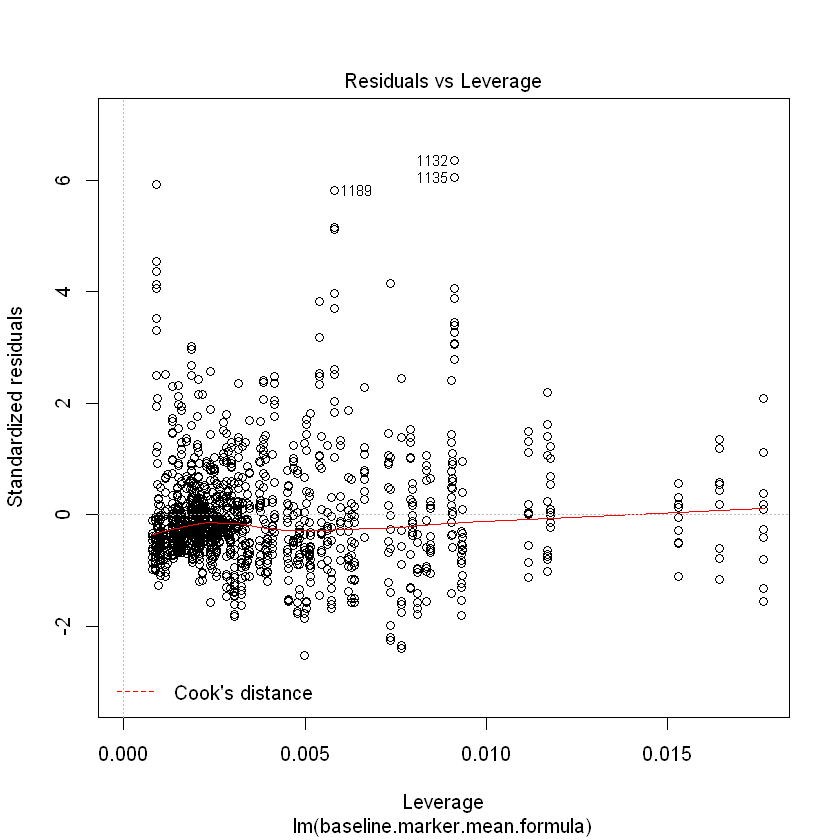

In [81]:
comp.model <-lm(baseline.marker.mean.formula, data=data.spoofer)
summary(comp.model)
plot(comp.model)

In [36]:
AIC(lm(baseline.marker.mean.formula, data=data.spoofer))
BIC(lm(baseline.marker.mean.formula, data=data.spoofer))

[1] 15912.12

[1] 15958.58

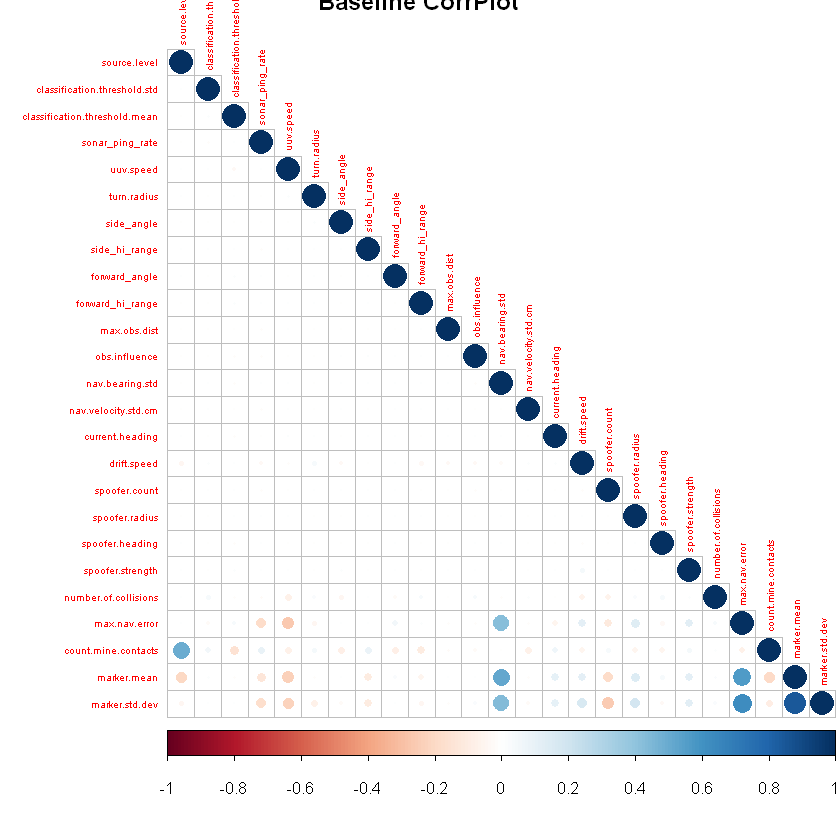

In [64]:
library(Hmisc)
library(corrplot)

cor.spoofer <- rcorr(as.matrix(data.spoofer[c(2:21,25:29)]))

corrplot(cor.spoofer$r, main="Baseline CorrPlot", type="lower", tl.cex=0.5)

In [63]:
colnames(data.spoofer)

[1] "experiment.number"             "source.level"                 
 [3] "classification.threshold.std"  "classification.threshold.mean"
 [5] "sonar_ping_rate"               "uuv.speed"                    
 [7] "turn.radius"                   "side_angle"                   
 [9] "side_hi_range"                 "forward_angle"                
[11] "forward_hi_range"              "max.obs.dist"                 
[13] "obs.influence"                 "nav.bearing.std"              
[15] "nav.velocity.std.cm"           "current.heading"              
[17] "drift.speed"                   "spoofer.count"                
[19] "spoofer.radius"                "spoofer.heading"              
[21] "spoofer.strength"              "X.run.number."                
[23] "random.seed"                   "X.step."                      
[25] "number.of.collisions"          "max.nav.error"                
[27] "count.mine.contacts"           "marker.mean"                  
[29] "marker.std.dev"